<a href="https://colab.research.google.com/github/prajpatil03/patilprajkta/blob/main/Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Detection and Classification of Healthy & Diseased Plant Leaf using Image Processing  by CNN**

# Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Libraries.

In [ ]:
import cv2                     # working with, mainly resizing, images
import numpy as np             # dealing with arrays
import os                      # dealing with directories
from random import shuffle     # mixing up or currently ordered data that might lead our network astray in training. 
from tqdm import tqdm          # for adding progress bar

# Mention the directory

In [ ]:
TRAIN_DIR1='/content/gdrive/MyDrive/Healthy n diseased leaf (1)/Potato___Early_blight (1)'
TRAIN_DIR2='/content/gdrive/MyDrive/Healthy n diseased leaf (1)/Potato___healthy'
TEST_DIR='/content/gdrive/MyDrive/Healthy n diseased leaf (1)/Test set'
IMG_SIZE=100
LR=1e-3

MODEL_NAME='leaf detector-{}-{}.model'.format(LR, '2conv-basic')

# Create a train dataset

In [ ]:
def create_train_data():
    training_data = [] 
    
    for img in tqdm(os.listdir(TRAIN_DIR1)):
        label = [0,1]
        path = os.path.join(TRAIN_DIR1,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])

    for img in tqdm(os.listdir(TRAIN_DIR2)):
        label = [1,0]
        path = os.path.join(TRAIN_DIR2,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])

    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data
     

In [ ]:
train_data = create_train_data()

100%|██████████| 152/152 [00:49<00:00,  3.08it/s]
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


# Create a test dataset

In [ ]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img)])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [ ]:
test_data=process_test_data()

100%|██████████| 65/65 [00:16<00:00,  3.98it/s]


# Import modules to train the model

In [ ]:
pip install tflearn

     |████████████████████████████████| 107 kB 8.2 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=6ac71bcec37aeb78fbbbb07201f283455766b21e404d80b5b40549e3ff2e344d
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [ ]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

Instructions for updating:
non-resource variables are not supported in the long term


# Fit & compile the model

In [ ]:
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

# Split out training & testing data

In [ ]:
train = train_data[:-500]
test = train_data[-500:]

In [ ]:
train

[[array([[155, 170, 159, ..., 139, 146, 148],
         [162, 175, 169, ..., 141, 134, 138],
         [158, 182, 184, ..., 130, 147, 134],
         ...,
         [195, 196, 189, ..., 140, 143, 151],
         [195, 197, 193, ..., 144, 142, 145],
         [184, 187, 191, ..., 132, 153, 134]], dtype=uint8), array([0, 1])],
 [array([[164, 159, 153, ..., 130, 153, 141],
         [164, 182, 176, ..., 138, 134, 147],
         [175, 175, 153, ..., 131, 149, 127],
         ...,
         [180, 183, 206, ..., 168, 169, 168],
         [191, 186, 193, ..., 174, 162, 154],
         [193, 179, 177, ..., 184, 162, 177]], dtype=uint8), array([0, 1])],
 [array([[172, 173, 170, ..., 194, 190, 191],
         [179, 181, 175, ..., 189, 183, 188],
         [178, 184, 182, ..., 195, 199, 186],
         ...,
         [131, 133, 111, ..., 139, 127, 137],
         [127, 125, 135, ..., 133, 124, 131],
         [125, 124, 139, ..., 135, 132, 116]], dtype=uint8), array([0, 1])],
 [array([[145, 144, 140, ...,  96,  9

# Creating data arrays & seprating features and labels

In [ ]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]
X
Y

[array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([

In [ ]:
test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

# Model fit for 5 epochs

In [ ]:
model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}),  snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 54  | total loss: 3.26818 | time: 0.169s
| Adam | epoch: 005 | loss: 3.26818 - acc: 0.8526 -- iter: 640/685
Training Step: 55  | total loss: 3.26818 | time: 1.186s
| Adam | epoch: 005 | loss: 3.26818 - acc: 0.8581 | val_loss: 2.67100 - val_acc: 0.8840 -- iter: 685/685
--


In [ ]:
import tensorflow as tf

In [ ]:
tf.compat.v1.reset_default_graph() 

In [ ]:
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [ ]:
if os.path.exists('C:/Users/H/Desktop/KaggleDogsvsCats/{}.meta'.format(MODEL_NAME)):
  model.load(MODEL_NAME)
  print('model loaded!')


In [ ]:
train = train_data[:-500]
test = train_data[-500:]

In [ ]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]
test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

# Model fit for 15 epochs

In [ ]:
model.fit({'input': X}, {'targets': Y}, n_epoch=15, validation_set=({'input': test_x}, {'targets': test_y}), snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 274  | total loss: 0.10822 | time: 0.182s
| Adam | epoch: 025 | loss: 0.10822 - acc: 0.9810 -- iter: 640/685
Training Step: 275  | total loss: 0.10629 | time: 1.202s
| Adam | epoch: 025 | loss: 0.10629 - acc: 0.9782 | val_loss: 0.14532 - val_acc: 0.9420 -- iter: 685/685
--


In [ ]:
model.save(MODEL_NAME)

INFO:tensorflow:/content/leaf detector-0.001-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


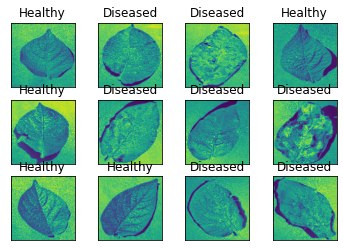

In [ ]:
import matplotlib.pyplot as plt

test_data = np.load('test_data.npy')

fig=plt.figure()

for num,data in enumerate(test_data[:12]):
     # Healthy: [1,0]
     # Diseased:[0,1]

     #img_num = data[1]
      img_data = data[0]
    
      y = fig.add_subplot(3,4,num+1)
      orig = img_data
      data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
      model_out = model.predict([data])[0]
    
      if np.argmax(model_out) == 1: str_label='Diseased'
      else: str_label='Healthy'  
      y.imshow(orig,)
      plt.title(str_label)
      y.axes.get_xaxis().set_visible(False)
      y.axes.get_yaxis().set_visible(False)
plt.show() 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
Directory='/content/drive/MyDrive/Testing images'
IMG_SIZE=100
LR=1e-3

# Test the model against unlabelled data

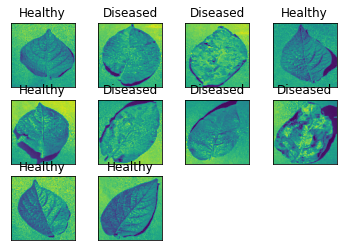

In [ ]:
import matplotlib.pyplot as plt
 
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(Directory)):
        path = os.path.join(Directory,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img)])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data
 
fig=plt.figure()
 
for num,data in enumerate(test_data[:10]):
     # Healthy: [1,0]
     # Diseased:[0,1]
 
     #img_num = data[1]
      img_data = data[0]
    
      y = fig.add_subplot(3,4,num+1)
      orig = img_data
      data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
      model_out = model.predict([data])[0]
    
      if np.argmax(model_out) == 1: str_label='Diseased'
      else: str_label='Healthy'
        
      y.imshow(orig,)
      plt.title(str_label)
      y.axes.get_xaxis().set_visible(False)
      y.axes.get_yaxis().set_visible(False)
plt.show()